In [1]:
import scanpy as sc
import anndata
import numpy as np
import torch
from utils import get_R

In [2]:
slices = "P2_ST_rep1"
gene_names = list(np.load(r'D:\dataset\Her2st\data/skin_hvg_cut_1000.npy', allow_pickle=True))
vis_genes = ["SPINK5", "DMKN", "SBSN", "KRTDAP", "RPL13"]
adata_pred_path = "./result/cSCC"
true_graph_data = torch.load(rf'./result/cSCC/P2_ST_rep1_ture.pt')
true = true_graph_data["target"]["y"].detach().cpu().numpy()
spot_corrd = true_graph_data["target"]["pos"].detach().cpu().numpy()

In [3]:
adata_true = anndata.AnnData(X=true)
adata_true.obsm['spatial'] = spot_corrd
adata_true.var_names = gene_names

In [4]:
adata_pred = sc.read_h5ad(adata_pred_path + f'/{slices}_pred.h5ad')
adata_pred.obsm['spatial'] = spot_corrd
adata_pred.var_names = gene_names

In [8]:
pcc = get_R(adata_pred, adata_true)[0]
np.nanmean(pcc)

0.5589718880050979

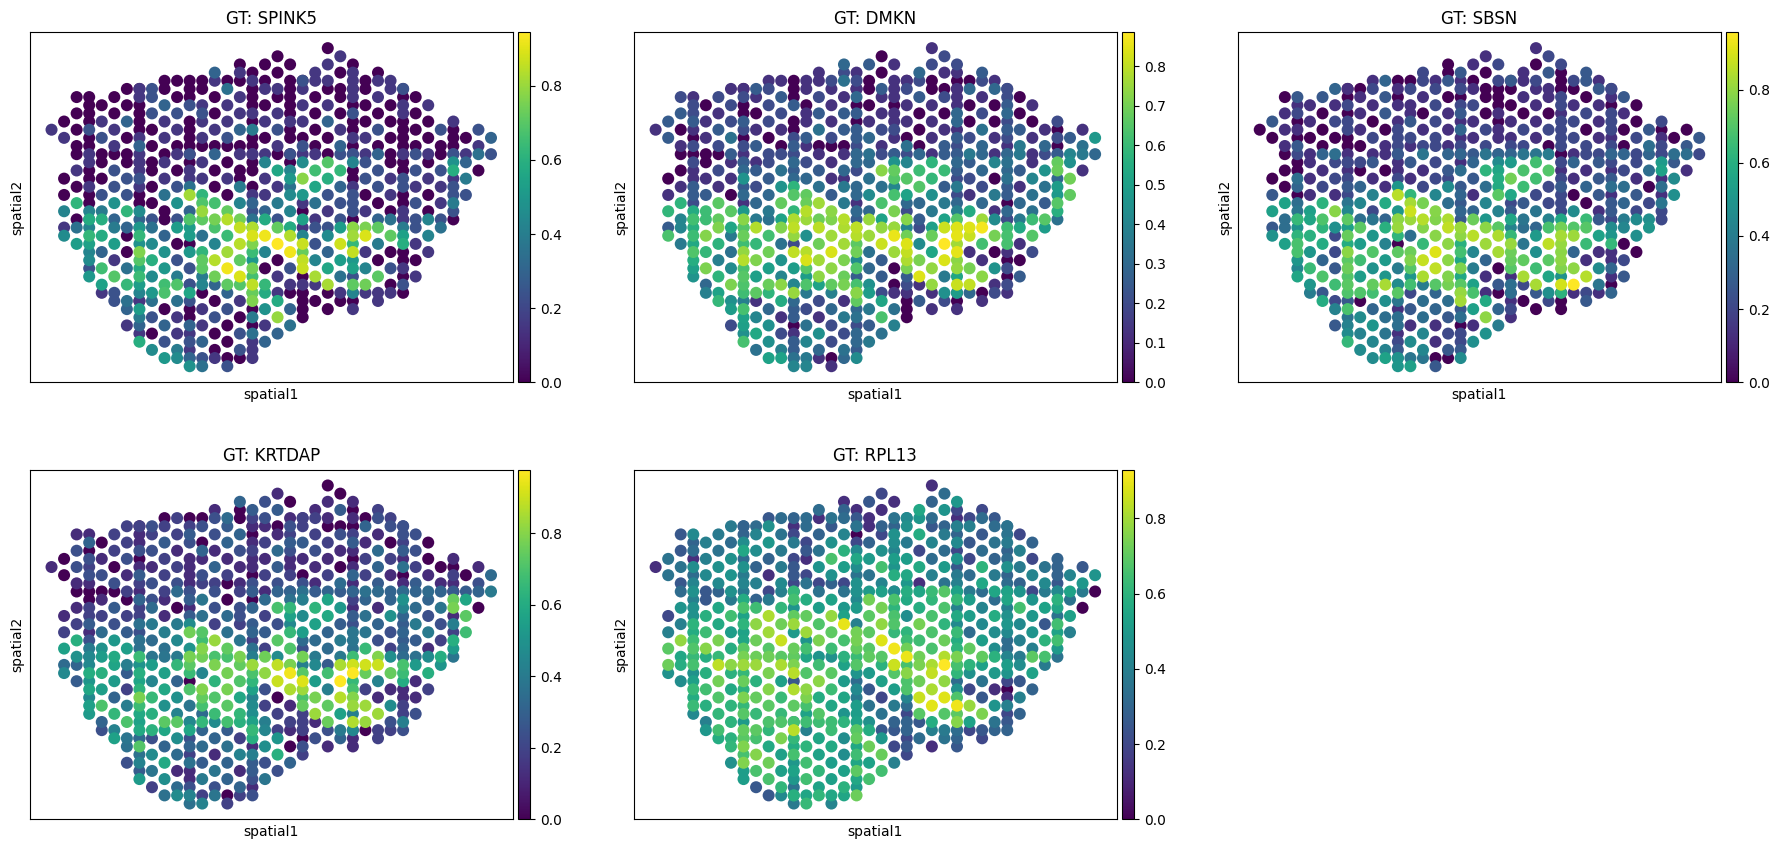

In [6]:
sc.pl.embedding(
        adata_true,
        basis="spatial",
        color=vis_genes,
        title=[f"GT: {g}" for g in vis_genes],
        ncols=3,
        size=300,
        show=True
    )

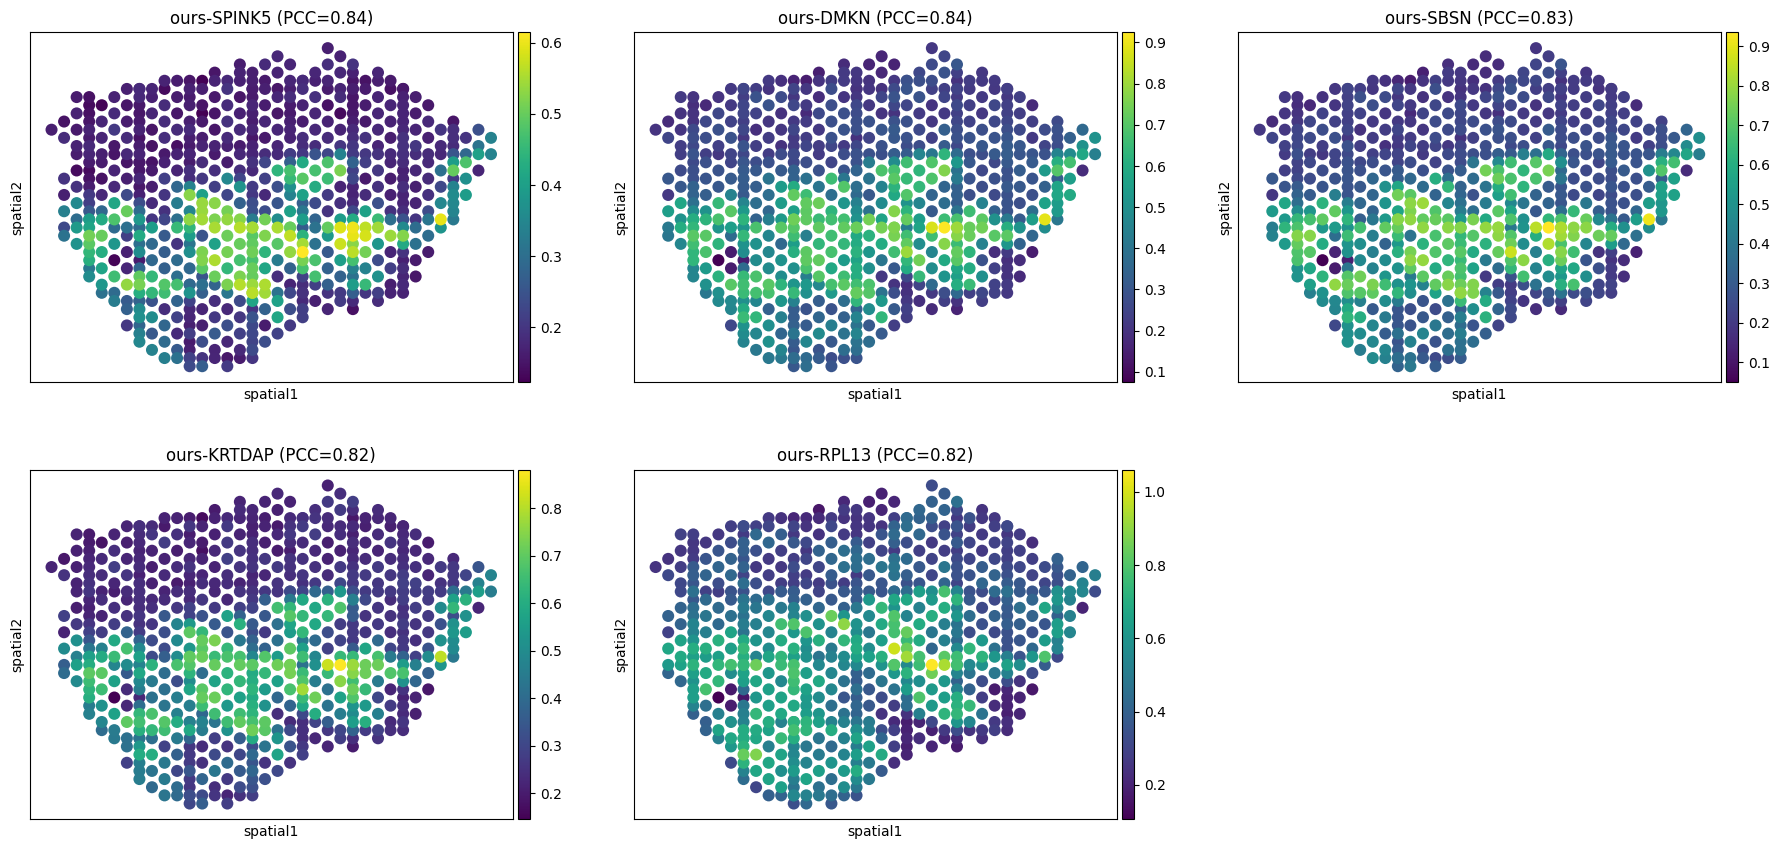

In [9]:
vis_indices = [gene_names.index(g) for g in vis_genes]
ours_vis_pccs = [pcc[i] for i in vis_indices]
sc.pl.embedding(
        adata_pred,
        basis="spatial",
        color=vis_genes,
        title=[
            f"ours-{gene} (PCC={pcc:.2f})"
            for gene, pcc in zip(vis_genes, ours_vis_pccs)
        ],
        ncols=3,
        size=300,
        show=True
    )